In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,accuracy_score,log_loss
from sklearn.model_selection import train_test_split,StratifiedKFold , GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [43]:
cancer = pd.read_csv('BreastCancer.csv')

In [44]:
X = cancer.drop('Class',axis=1)
y = cancer['Class']

In [45]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=24,test_size=0.3,stratify=y)

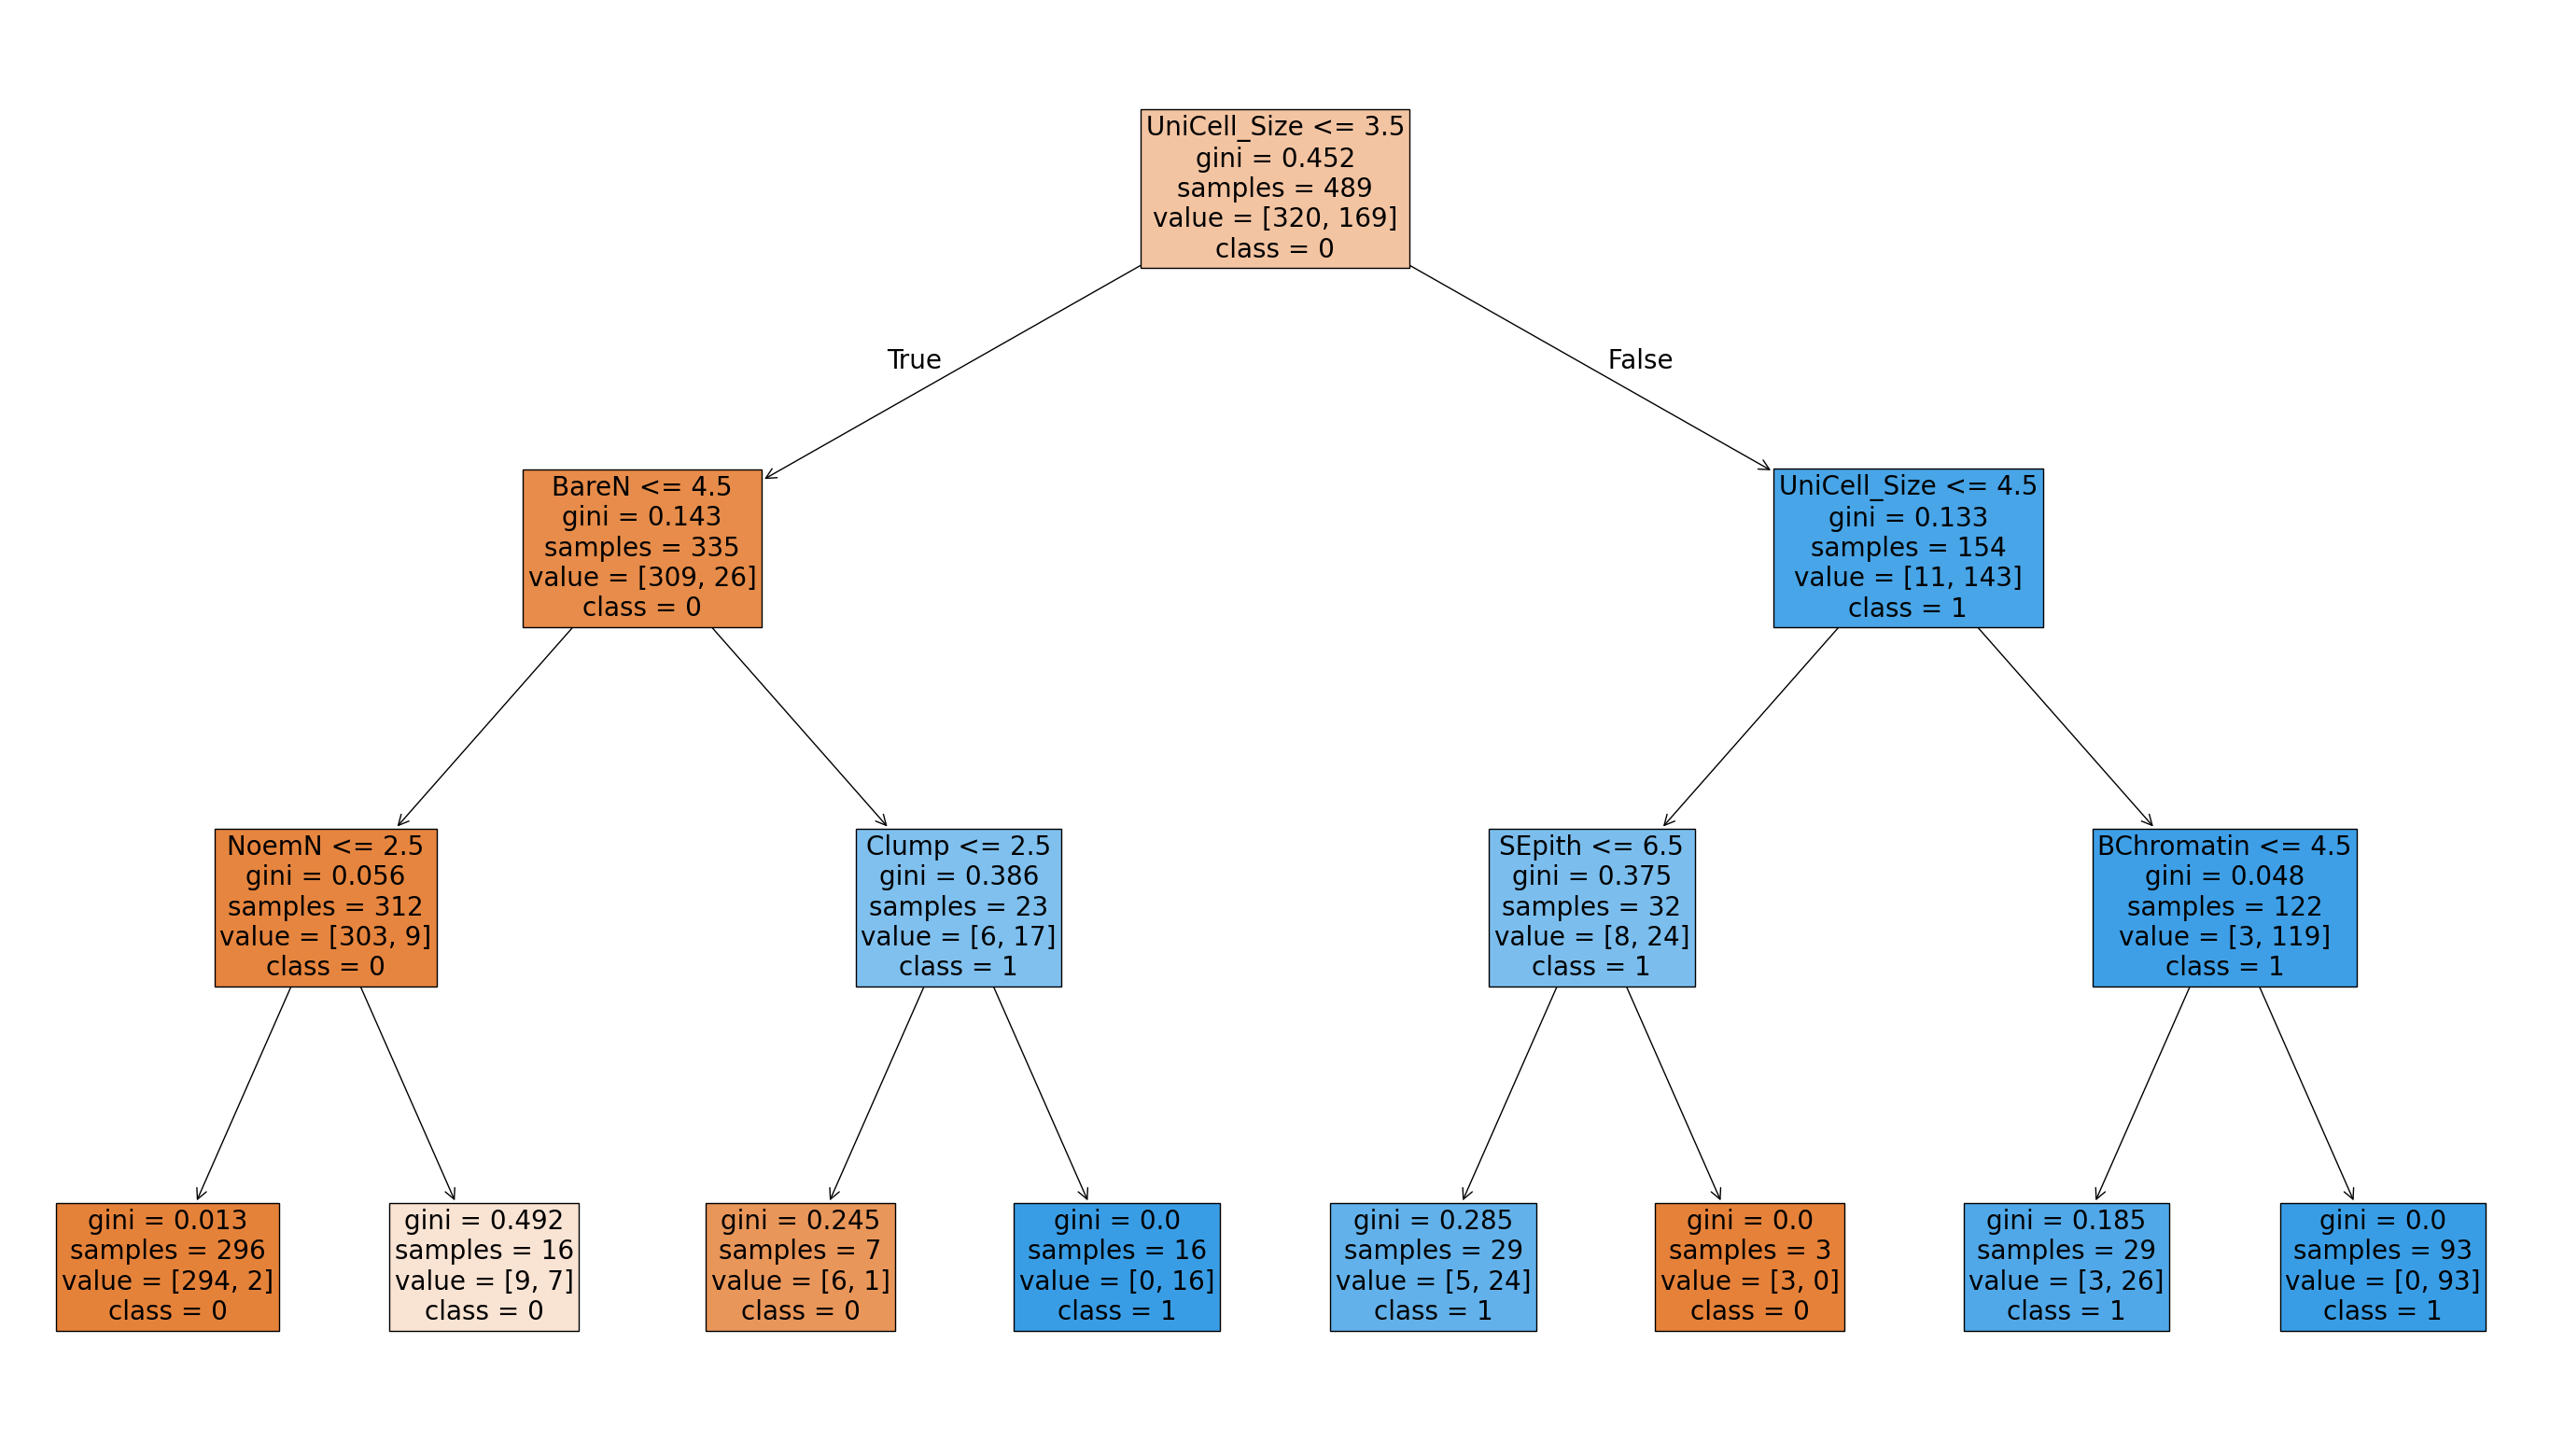

In [46]:
dtc = DecisionTreeClassifier(random_state=24,max_depth=3)
dtc.fit(X_train,y_train)
plt.figure(figsize=(35,20))
plot_tree(dtc,feature_names=list(X.columns),class_names=['0','1'],filled=True,fontsize=20)
plt.show()

In [47]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9523809523809523


In [48]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))

0.9486714975845412


In [49]:
svm = SVC(kernel='rbf',probability=True,random_state=24)

dtc = DecisionTreeClassifier(random_state=24,max_depth=3)

params = {'max_depth':[2,3,4,5,6,None]}
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)

gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='roc_auc')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=24),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]},
             scoring='roc_auc')

In [50]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 5}
0.9607632219156177


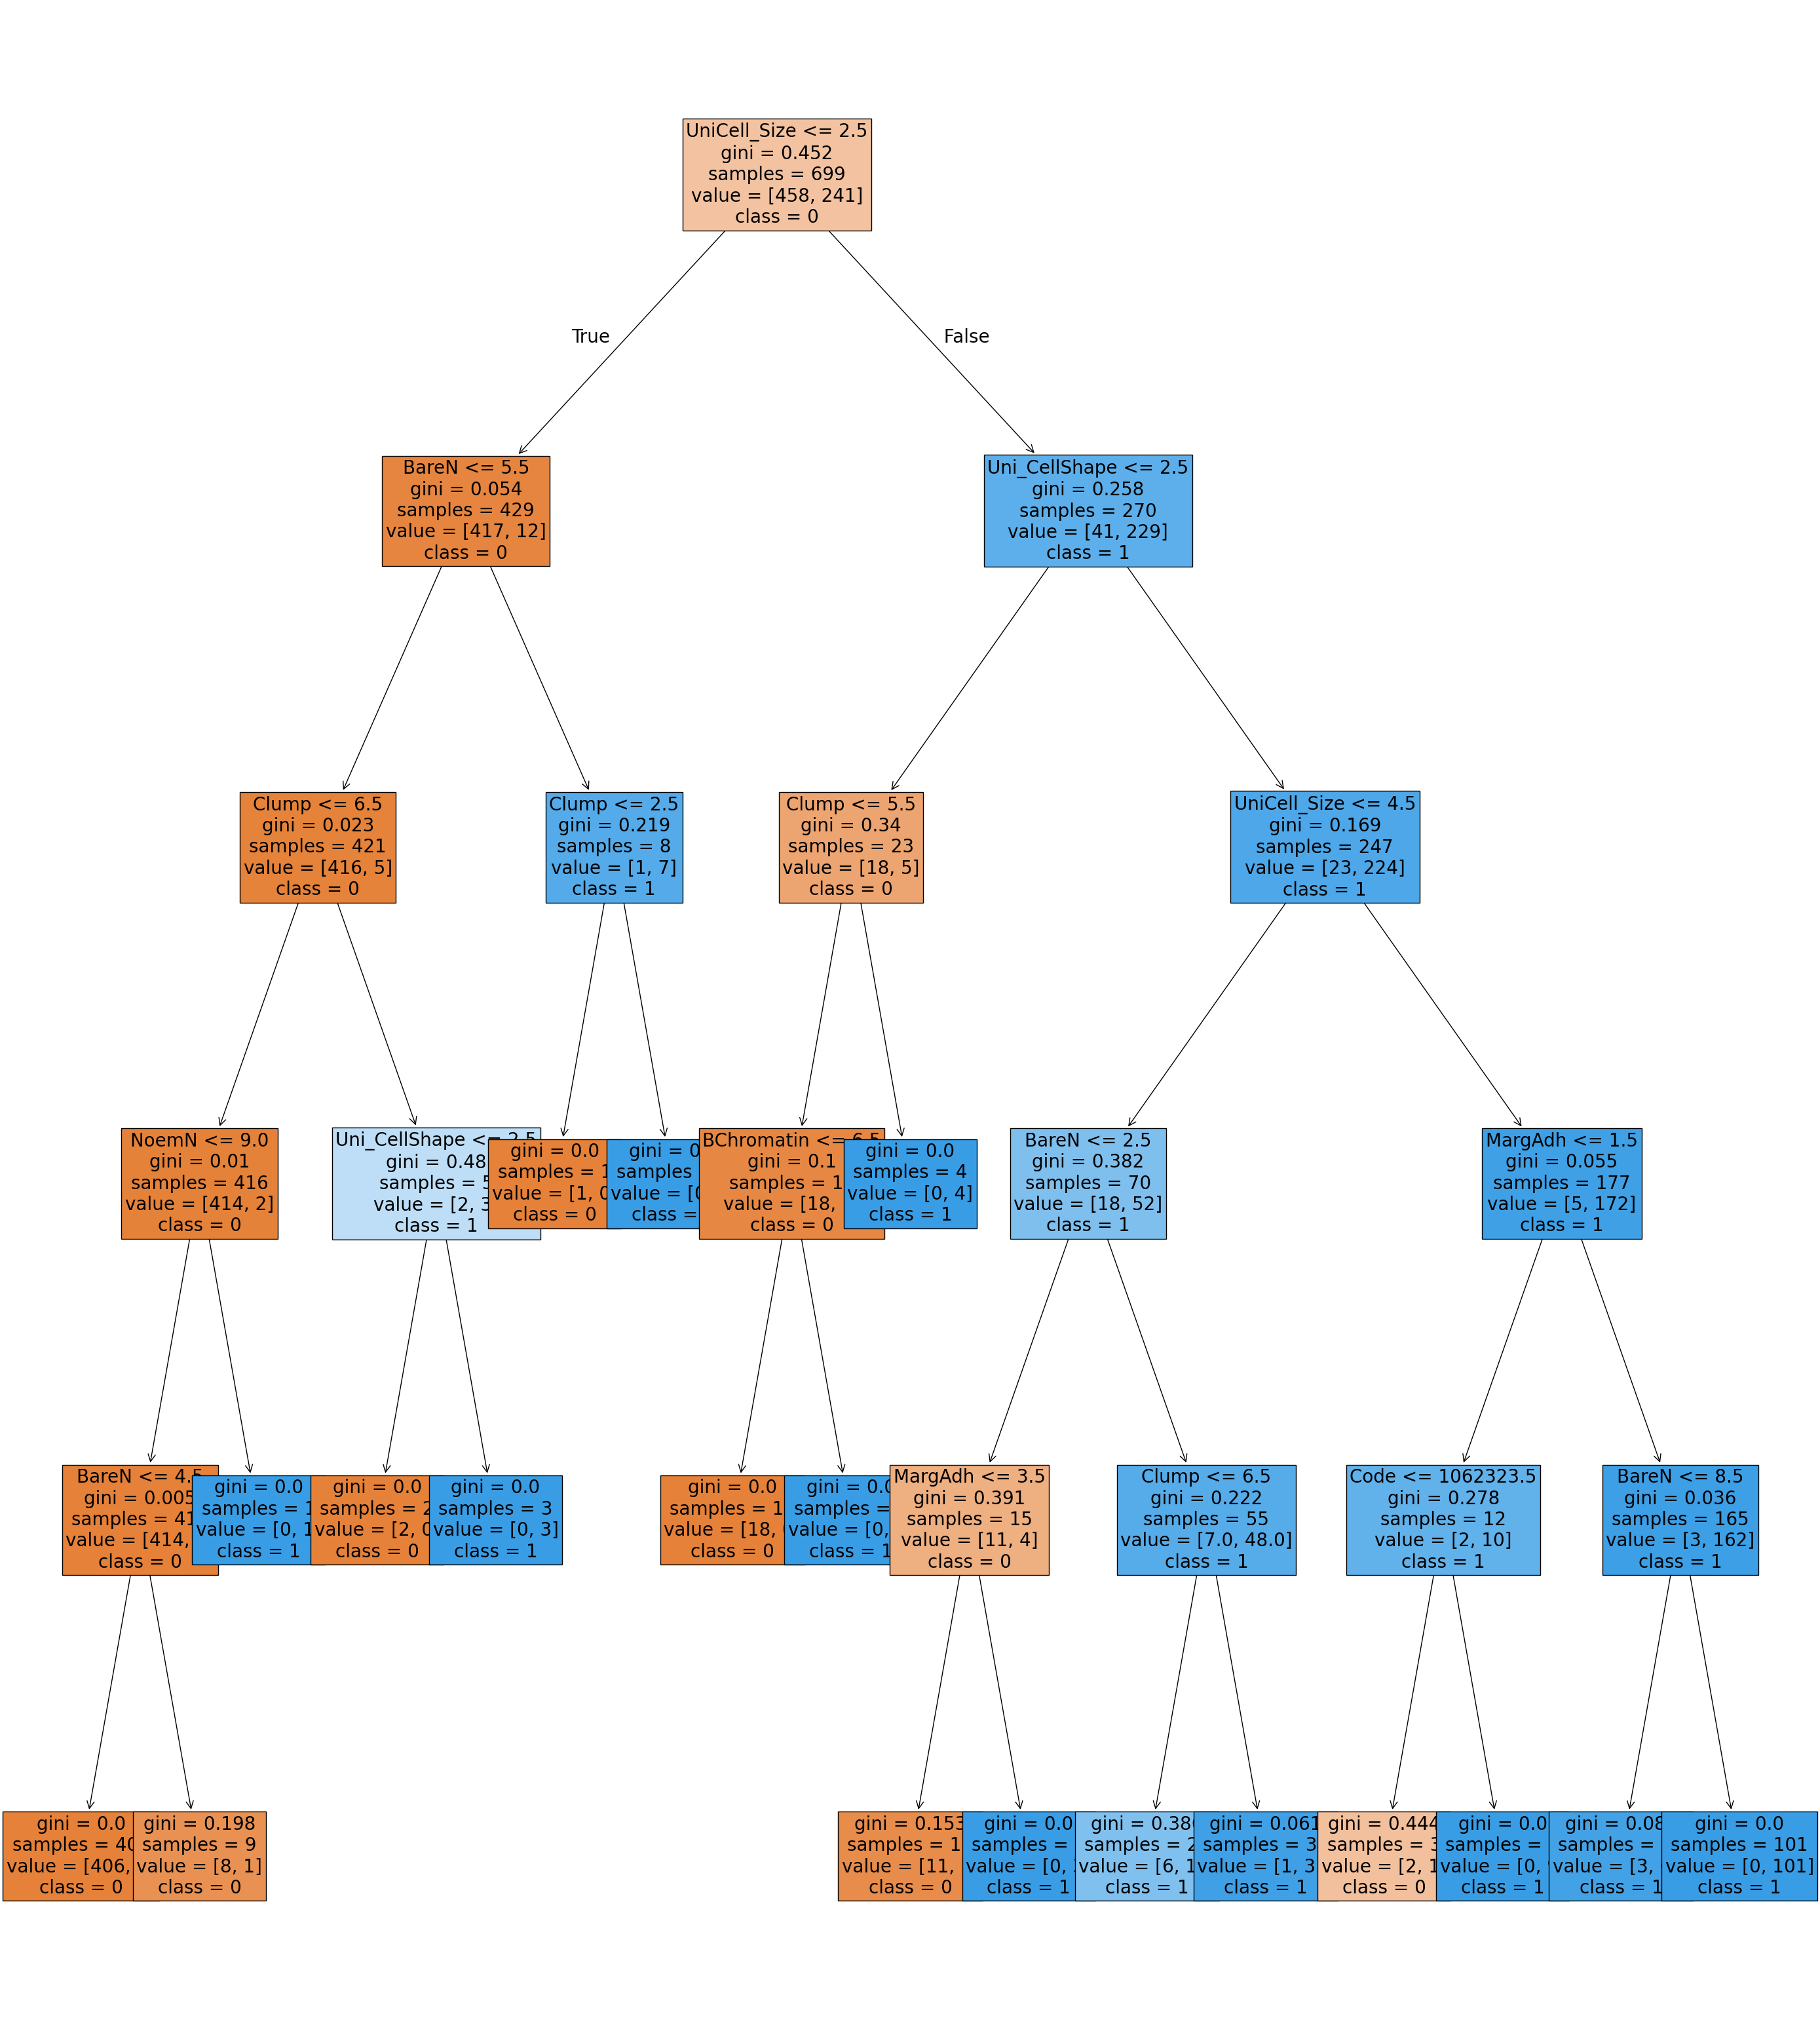

In [54]:
best_tree = gcv.best_estimator_
plt.figure(figsize=(35,40))
plot_tree(best_tree,feature_names=list(X.columns),class_names=['0','1'],filled=True,fontsize=20)
plt.show()

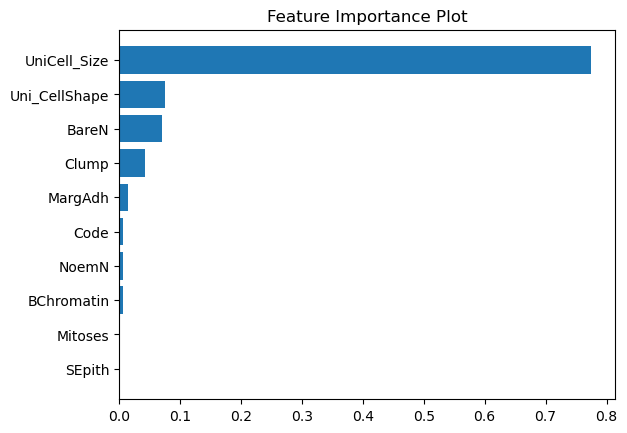

In [58]:
df_imp = pd.DataFrame({'feature':list(X.columns),'importance':best_tree.feature_importances_})
df_imp.sort_values('importance',inplace=True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title('Feature Importance Plot')
plt.show()